In [66]:
#import utilities
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch, DBSCAN
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score

In [67]:
# Load the DF
df = pd.read_csv('penguins.csv')
df.head()

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


C:\Users\Andrew\AppData\Local\Temp\ipykernel_30748\4125171749.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['cluster'] = dbscan.fit_predict(scaled_data)


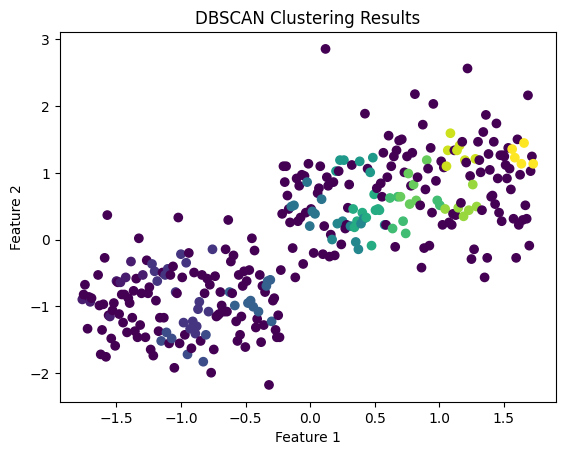

In [68]:
# DBSCAN Methodology
# DBSCAN, or "Density-Based Spatial Clustering", identifies clusters based on dense regions within the data space.
# It usually works with irregular shaped clusters.

# Dropping non-numeric columns + NaN data
df_clean = df.dropna()
numeric_data = df_clean.drop(['species', 'island', 'sex'], axis=1)

# Standardization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_clean['cluster'] = dbscan.fit_predict(scaled_data)

# Result Visualiziation
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=df_clean['cluster'], cmap='viridis')
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

C:\Users\Andrew\AppData\Local\Temp\ipykernel_30748\1971662667.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['cluster'] = birch.fit_predict(scaled_data)


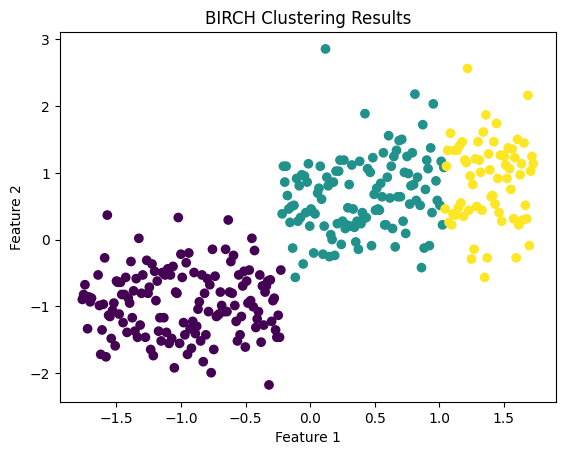

In [69]:

# Birch Methodology
# Birch, or "Balanced Iterative Reducing and Clustering using Hierarchies" builds a tree structure to represent the dataset.
# Clustering is performed based on subclusters. It is best for large datasets.

# Applying BIRCH
birch = Birch(threshold=0.5, branching_factor=50, n_clusters=3)
df_clean['cluster'] = birch.fit_predict(scaled_data)

# Result Visualization
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=df_clean['cluster'], cmap='viridis')
plt.title('BIRCH Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


C:\Users\Andrew\AppData\Local\Temp\ipykernel_30748\3745191416.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['cluster'] = agg_cluster.fit_predict(scaled_data)


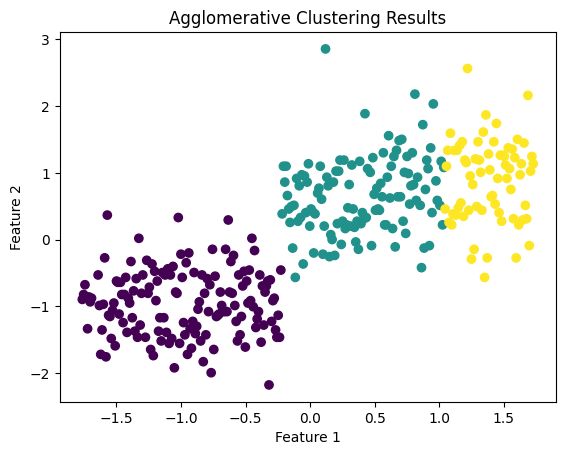

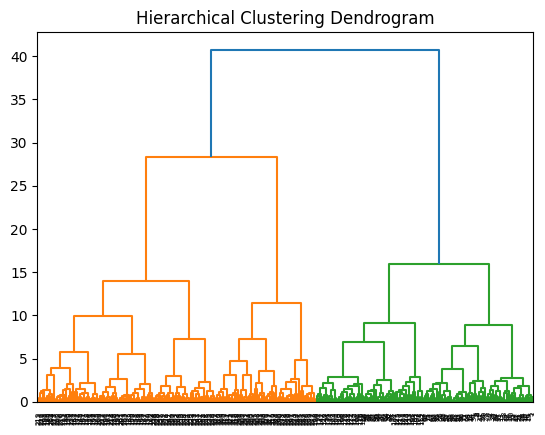

In [70]:
# Agglomerative Clustering Methodology
# This algorithm builds hierarchical clusters by agglomerating nearby pairs of clusters iteratively.
# This method provides a more hierarchical structure of clusters.

# Importing extra dependencies
from scipy.cluster.hierarchy import dendrogram, linkage

# Applying Agglomerative Clustering
n_clusters = 3  # You can adjust this parameter based on your needs
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')  # 'ward' linkage minimizes the variance between clusters
df_clean['cluster'] = agg_cluster.fit_predict(scaled_data)

# Result Visualization
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=df_clean['cluster'], cmap='viridis')
plt.title('Agglomerative Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Plot dendrogram
linked = linkage(scaled_data, 'ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


C:\Users\Andrew\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Andrew\AppData\Local\Temp\ipykernel_30748\4272729652.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['cluster'] = kmeans.fit_predict(scaled_data)


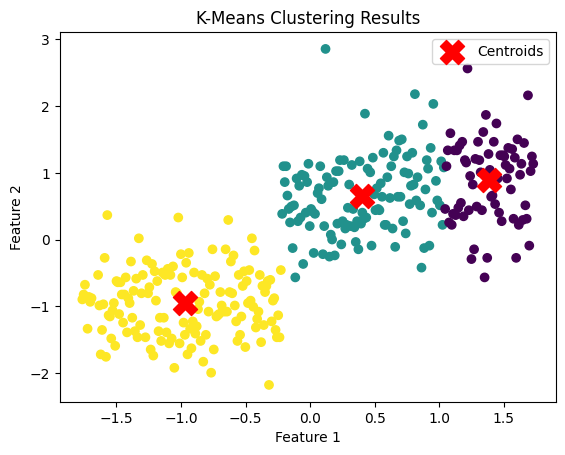

In [71]:
# KMeans Methodology
# This method divides the dataset into K clusters based on feature mean values.
# Oftentimes, it works best when clusters are spherical and equally sized.

# Apply K-Means clustering
n_clusters = 3  # You can adjust this parameter based on your needs
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_clean['cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the results (2D example using the first two features)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=df_clean['cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [72]:
# Evaluation for each methodlogy

# KMeans clustering
kmeans = KMeans(n_clusters=3)
kmeans_labels = kmeans.fit_predict(scaled_data)
kmeans_silhouette = silhouette_score(scaled_data, kmeans_labels)
kmeans_davies_bouldin = davies_bouldin_score(scaled_data, kmeans_labels)
kmeans_calinski_harabasz = calinski_harabasz_score(scaled_data, kmeans_labels)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)
dbscan_silhouette = silhouette_score(scaled_data, dbscan_labels)
dbscan_davies_bouldin = davies_bouldin_score(scaled_data, dbscan_labels)
dbscan_calinski_harabasz = calinski_harabasz_score(scaled_data, dbscan_labels)

# Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_cluster.fit_predict(scaled_data)
agg_silhouette = silhouette_score(scaled_data, agg_labels)
agg_davies_bouldin = davies_bouldin_score(scaled_data, agg_labels)
agg_calinski_harabasz = calinski_harabasz_score(scaled_data, agg_labels)

# BIRCH clustering
birch = Birch(threshold=0.5, branching_factor=50, n_clusters=3)
birch_labels = birch.fit_predict(scaled_data)
birch_silhouette = silhouette_score(scaled_data, birch_labels)
birch_davies_bouldin = davies_bouldin_score(scaled_data, birch_labels)
birch_calinski_harabasz = calinski_harabasz_score(scaled_data, birch_labels)

# Displaying scores
print("Clustering Methods    :", "kmeans_labels,", "agglomerative_labels,", "dbscan_labels,", "birch_labels")
print("Silhouette Scores     :", [kmeans_silhouette, agg_silhouette, dbscan_silhouette, birch_silhouette])
print("Davies Bouldin Indices:", [kmeans_davies_bouldin, agg_davies_bouldin, dbscan_davies_bouldin, birch_davies_bouldin])
print("Calinski-Harabasz Score:", [kmeans_calinski_harabasz, agg_calinski_harabasz, dbscan_calinski_harabasz, birch_calinski_harabasz])

Clustering Methods    : kmeans_labels, agglomerative_labels, dbscan_labels, birch_labels
Silhouette Scores     : [0.44221061372216586, 0.44221061372216586, -0.2713421476300927, 0.44221061372216586]
Davies Bouldin Indices: [0.9626595284271743, 0.9626595284271741, 1.2856946799611557, 0.9626595284271741]
Calinski-Harabasz Score: [264.69919911493076, 264.69919911493076, 8.905260949861797, 264.69919911493076]


C:\Users\Andrew\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
